# Computer vision pipeline

A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. The general pipeline and a specific example of a pipeline applied to facial expression recognition is pictured below.

![Face recognition pipeline](images/face_recognition_pipeline.png)

### Standardizing Data

Pre-processing images is all about standardizing input images so that you can move further along the pipeline and analyze images in the same way. In machine learning tasks, the pre-processing step is often one of the most important. For example, for a traffic sign classification task:

![Traffic sign](images/traffic_sign_classification.png)

If the images are different sizes, or even cropped differently, then this counting tactic will likely fail. So, it's important to pre-process these images so that they are standardized before they move along the pipeline. In the example below, you can see that the images are pre-processed into a standard square size.

The algorithm counts up the number of red pixels in a given image and if there are enough of them, it classifies an image as a stop sign. In this example, we are just extracting a color feature and skipping over selecting an area of interest (we are looking at the whole image). In practice, you'll often see a classification pipeline that looks like this:

![Correct Traffic classification](images/traffic_sign_classification_2.png)

# Images as Grids of Pixels

### Import resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in and display the image

Image dimensions: (427, 640, 3)
Image dimensions: (427, 640)


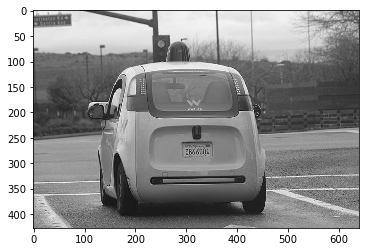

In [11]:
# Read in the image
image = cv2.imread('images/waymo_car.jpg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plt.imshow(image_rgb)
plt.imshow(gray_image, cmap='gray')
print('Image dimensions:', gray_image.shape)

In [3]:
# Print specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300

print(gray_image[y,x])
print(gray_image[0][0:10])
print(gray_image[0, 0:10])


160
[238 236 237 241 239 223 192 167 220 241]
[238 236 237 241 239 223 192 167 220 241]


In [4]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  3


[[141 141 141 ... 126 125 125]
 [142 142 142 ... 126 126 126]
 [143 143 142 ... 127 127 126]
 ...
 [144 144 143 ... 134 135 135]
 [145 145 144 ... 137 137 137]
 [147 146 146 ... 140 140 140]]


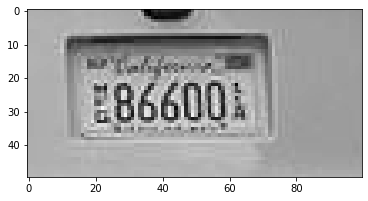

In [5]:
# Display a specific part of the image

sub_image = gray_image[250:300, 280:380]
print(sub_image)
plt.imshow(sub_image, cmap='gray')

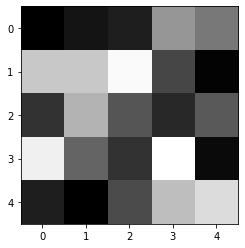

In [6]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

plt.imshow(tiny_image, cmap='gray')

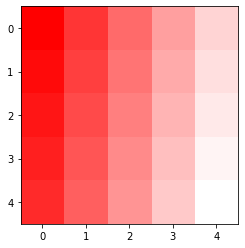

In [7]:
# Code to display a grayscale gradient
gradient_size = 5
gradient = np.zeros((gradient_size, gradient_size, 3), dtype=np.uint8)

scale = 255 / (gradient_size*gradient_size-1)

for x in range(gradient.shape[0]):
    for y in range(gradient.shape[1]):
        gradient[y, x, 0] = 255
        gradient[y, x, 1:] = (x * gradient_size + y) * scale

plt.imshow(gradient, cmap='gray')